<a href="https://colab.research.google.com/github/viriditass/Miscellaneous/blob/main/Markov_chain.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Markov chain**

## **1. What is Markov chanin?**

**마르코프 프로세스(Markov process, MP)는 마르코프 특성(Markov property)을 지니는 이산시간(discrete time) 확률과정(stochastic process)이다.** 낯선 단어들에 당황하지 말고, 주오요 단어들을 하나하나 살펴보겠다. 먼저, 확률 과정은 시간에 따라 어떤 사건이 발생할 확률이 변화하는 과저을 의미한다. 이산시간은 시간이 연속적으로 변하지 않고 이산적으로 변함을 의미한다. **마르코프 특성은 과거 상태들(s1, s2,....s(t-1))과 현재 상태(s(t))가 주어졌을 때, 미래 상태(s(t+1))는 과거 상태와는 독립적으로 현태 상태에 의해서만 결정된다는 것을 의미한다.** 다른 말로 표현하면, 과거와 현재 상태를 모두 고려했을 때 미래 상태가 나타날 확률과 현재 상태만을 고려했을 때 미래 상태가 발생활 확률이 동일하다는 것이다. 이를 식으로 나타내면 아래와 같다.

P[s(t+1) | s(t)] = P[s(t+1) | s1, s2,..., s(t)]

마르코프 프로세스는 이처럼 과거 상태를 기억하지 않기 때문에 **메모리리스 프로레스(memoryless process)**로 불리기도 한다. 또한, **마르코프 체인(Markov chain, MC)라고 불리기도 한다.

어떤 상태에서 다음 단계의 상태로 변화하는 것을 변이라고 하고, 그 확률을 **상태변이확률(state transition probability)**라고 한다. 시간 t에서의 상태를 s라고 하고, 시간 t+1에서의 상태를 s'라고 할 때, 상태변이확률은 다음과 같이 나타난다.

Pss' = P[s(t+1) = s' | st = s]

## **2. Example**

이해를 돕기 위해 예시를 들겠다.

아래의 조건을 따르는 신기한 레스토랑이 있다.
- 치킨, 피자, 햄버거 중 하루에 단 1개만 요리를 해서 서빙한다.
- 어제 무엇을 먹었는지에 따라 그 다음날에 무엇을 서빙할지 예측하는 방법이 있다.
- 위에서 말한 예측 방법은 아래의 이미지에 해당한다.

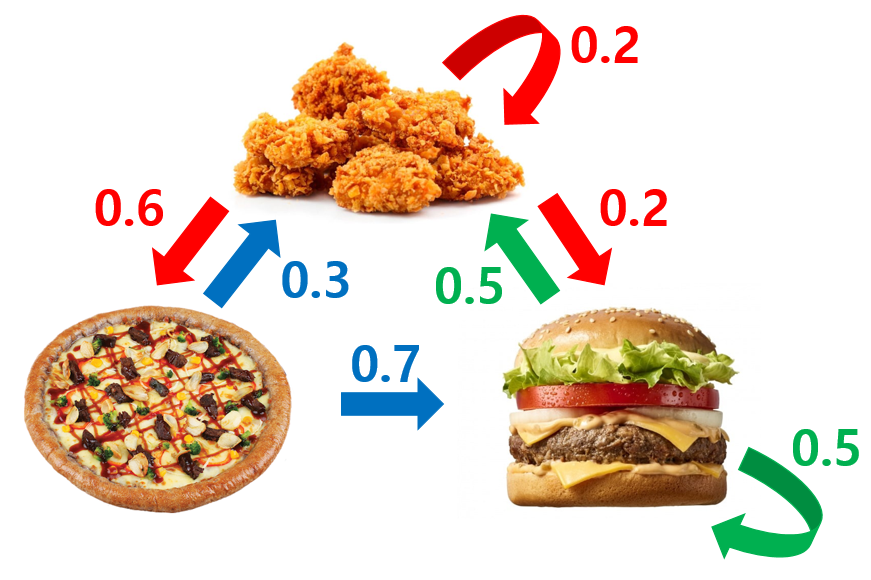

위 마르코프 체인에 한 상태에서 다른 상태로 변이하는 확률들을 모두 나타내었다. 예를 들어 연구 치킨에서 피자로 이동하는 상태변이확률은 0.6, 햄버거에서 치킨으로 이동하는 상태변이확률은 0.5으로 나타냈다. 여기서 주목할 것은 **한 상태에서 자신을 포함한 다른 상태들로 변이할 확률의 합은 1이라는 것**이다. **출력의 합은 1이지만, 입력의 합은 다양하다.**

위의 그림에 나온 전이 확률을 다시 적어보자면,
- 치킨 => 치킨로 전이할 확률은 0.2
- 치킨 => 피자로 전이할 확률은 0.6
- 치킨 => 햄버거로 전이할 확률은 0.2
- 피자 => 치킨로 전이할 확률은 0.3
- 피자 => 피자로 전이할 확률은 0.0
- 피자 => 햄버거로 전이할 확률은 0.7
- 햄버거 => 치킨로 전이할 확률은 0.5
- 햄버거 => 피자로 전이할 확률은 0
- 햄버거 => 햄버거로 전이할 확률은 0.5

이를 다시 상태변이확률 행렬로 적어보자면,

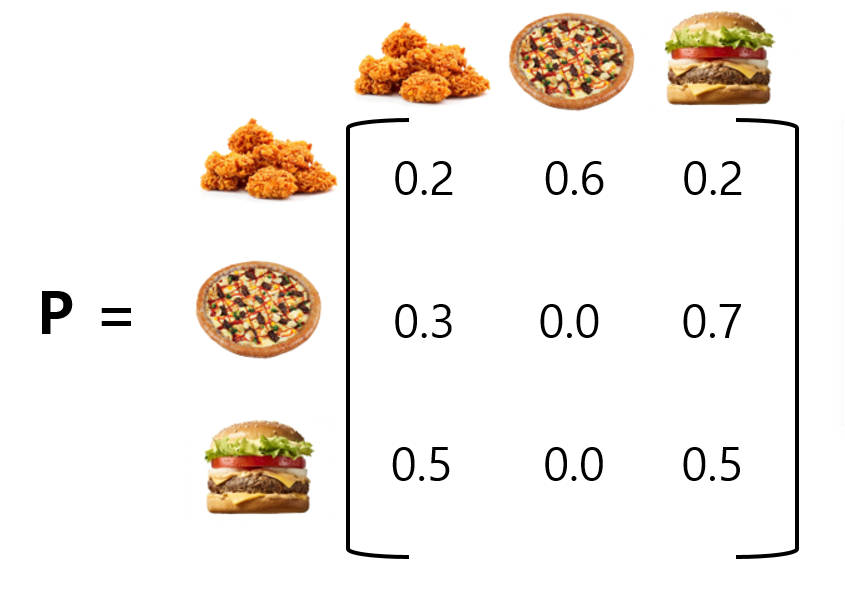

만일 [1일: 피자], [2일: 치킨], [3일: 피자]

일때, [4일: 햄버거]일 확률은 얼마나 될까?

바로 0.7이다.

그 이유는 바로 마로코프 체인은 위에서 말했다 싶이 미래의 일은 과거가 아닌 오직 현재만 영향을 끼치기 때문에, 피자에서 햄버거로 전이할 확률인 0.7이 된다.

### **Random walk**

10개를 무작위로 뽑아,

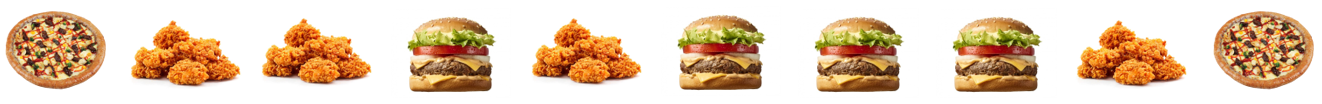


위의 이미지와 같이 나왔을 경우, 이 경우 [치킨=0.4], [피자=0.2], [햄버거=0.4]의 확률을 가진다고 생각을 할 수 있다.

하지만, 만일 10개가 아닌 1000개, 1000000개 이런식으로 무작위로 뽑았을 경우에도 이렇게 일일이 세야할까??

이렇게 많은 횟수를 반복하다보면 어느 순간에는 전이행렬이 변하지 않는 상태가 오는데 이를 두고 **안정상태(steady state)**라고 부르고, 확률이 직전 상태와 동일하게 수렴하게 된다. 또한, 이러한 확률 분포를 **정적 분포(Stationary Distribution)**라고 부른다.

아래는 이를 python으로 나타낸 코드이다.

#### **Python**

In [ ]:
import numpy as np

p = np.array([0.2, 0.6, 0.2, 0.3, 0, 0.7, 0.5, 0, 0.5]).reshape(3,3)

a = np.array([0, 1, 0])

for i in range(0, 3):
  a = np.dot(a, p)

print(a)

[0.341 0.246 0.413]


## **3. Example(2)**

이번엔 마르코프 체인을 좀 더 깊이있게 이해하기 위해 다른 예시를 살펴보겠다. 이번엔 콜라와 사이다로 예시를 들어보겠다. 현재 상황이 아래와 같다고 가정을 하겠다.

- 오늘 콜라를 먹은 사람의 80%가 다음 주에도 콜라를 먹는다. 나머지 20%는 사이다를 먹는다.
- 오늘 사이다를 먹은 사람의 70%가 다음 주에도 사이다를 먹는다. 나머지 30%는 콜라를 먹는다.
- 오늘 10억명이 콜라를 먹었고, 8억명이 사이다를 먹었을 때, 10일 후와 50일 후에 콜라와 사이다를 마시는 인구는 각각 어떻게 될까?
- (대신 저 위에 둘을 안먹었다가 새롭게 먹기 시작한 사람은 없다고 가정한다.)

**과거의 상태가 미래의 상태에 전혀 영향을 끼치지 않고, 오로지 현재의 상태만 미래의 상태에 영향을 끼치기 때문에 현재 상황을 마르코프 체인으로 나타낼 수 있다.**

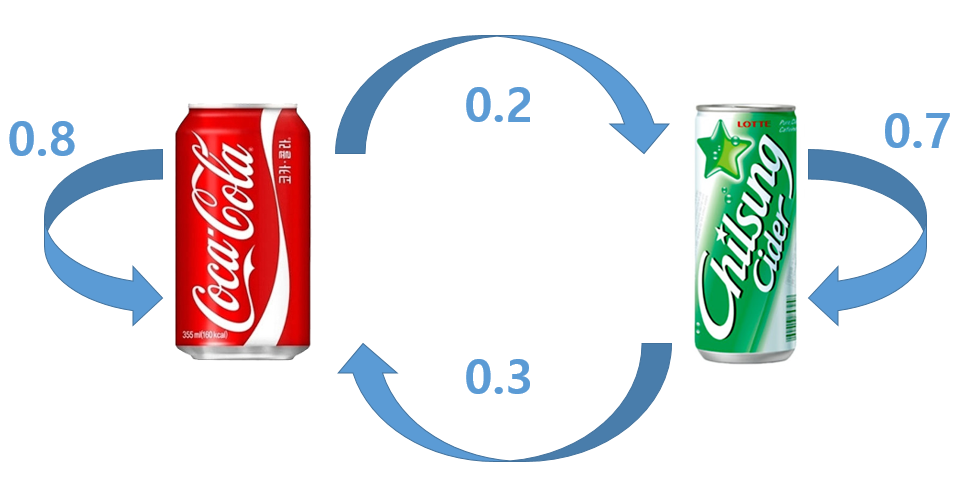

이를 상태변이확률 행렬로 나타내면 다음과 같다.

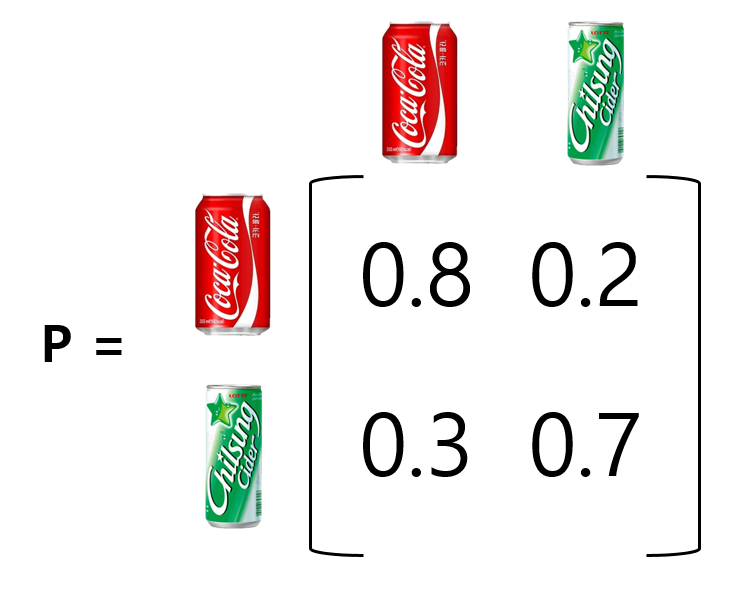

n일 후, 콜라를 먹는 인구를 Cola, 사이다를 먹는 인구를 Cider라고 나타내겠다. 오늘 콜라를 먹은 인구가 10억이고, 사이다를 먹은 인구는 8억이므로, Cola = 10, Cider = 8이 된다. 그러면 1일 후 콜라를 먹는 인구와 사이다를 먹는 인구는 각각 식으로 어떻게 표현할 수 있을까?

우선 1일 후 콜라를 먹는 인구는 오늘 콜라를 먹은 인구의 80%와 오늘 사이다를 먹은 인구의 30%이므로 다음과 같이 나타낼 수 있다.

Cola(1) = 0.8Cola(0) + 0.3Cider(0)

마찬가지로 사이다도 다음과 같이 나타낼 수 있다.


Cider(1) = 0.2Cola(0) + 0.7Cider(0)

이 두 식을 모아서 행렬의 행태로 나타내보겠다.

[Cola(1) Cider(1)] = [Cola(0) Cider(0)] [0.8 0.2 '\n' 0.3 0.7]

우변에 오른쪽 정방행렬이 상태변이확률 행렬과 같음에 주목해야한다.

이번에는 2일 후에 콜라와 사이다를 마시는 인구가 어떻게 되는지 살펴보겠다. 2일 후의 상태는 1일 후의 상태에서만 영향을 받으므로 다음과 같이 나타낼 수 있다.

[Cola(2) Cider(2)] = [Cola(1) Cider(1)] [0.8 0.2 '\n' 0.3 0.7]

여기서 재밌는 점은 위의 식에 바로 전의 식을 대입시키고, 또한 이어서 첫번째 식을 대입시키면 현재 상태와 상태변이확률 행렬만을 이용해서 3일 후의 상태를 나타낼 수 있다는 것이다.

[Cola(3) Cider(3)] = [Cola(0) Cider(0)] [0.8 0.2 '\n' 0.3 0.7]3

이것을 n일 후로 일반화하면 다음과 같다.

[Cola(n) Cider(n)] = [Cola(0) Cider(0)] [0.8 0.2 '\n' 0.3 0.7]n

식이 다 나왔으므로, n에 10과 50을 각각 대입하면 10일 후와 50일 후의 상태를 예측할 수 있다.

이를 python 코드로 나타내보겠다.

#### **Python**

In [2]:
import numpy as np

p = np.array([0.2, 0.6, 0.2, 0.3, 0, 0.7, 0.5, 0, 0.5]).reshape(3,3)

a = np.array([10, 8, 12])

for i in range(0, 50):
  a = np.dot(a, p)

print(a)

[10.56338028  6.33802817 13.09859155]


이를 통해 알 수 있는 점은 치킨과 햄버거는 이득을 보겠지만, 피자 회사에서는 적절히 손을 써야할 것이다.